# **라이브러리 불러오기**

In [164]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [165]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

# **[데이터 살펴보기]**

In [166]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [167]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [168]:
train.shape

(26457, 20)

In [169]:
test.shape

(10000, 19)

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리**

## **1. 결측치 제거** 

In [171]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [172]:
train[train['occyp_type'].isnull()]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


In [173]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [175]:
train['occyp_type'] = train['occyp_type'].fillna('NaN')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['occyp_type'] = le.fit_transform(train['occyp_type'])

0        12
1         8
2        10
3        15
4        10
         ..
26452     3
26453    12
26454     3
26455     8
26456    17
Name: occyp_type, Length: 26457, dtype: int64

In [178]:
le.classes_

array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'NaN', 'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype=object)

In [177]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,12,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,15,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,3,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,12,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,3,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,8,1.0,-59.0,2.0


In [131]:
# train=train.drop('occyp_type', axis=1)
# test=test.drop('occyp_type', axis=1)

## **2. Binary variables**

In [132]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


## **3. Continuous variable**

### (1) child_num

In [150]:
train['child_num'].value_counts(sort=False) #.plot.bar()

0    18340
1     5386
2     2731
Name: child_num, dtype: int64

In [134]:
# train.loc[train['child_num'] >= 2,'child_num']=2
# test.loc[test['child_num']>=2, 'child_num']=2

### (2) inc

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

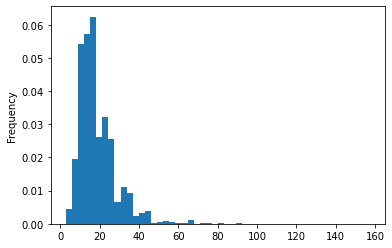

In [135]:
# train['income_total'] = train['income_total'].astype(object)
# train['income_total'] = train['income_total']/10000 
# test['income_total'] = test['income_total']/10000
# ##############################################################3
# print(train['income_total'].value_counts(bins=10,sort=False))
# train['income_total'].plot(kind='hist',bins=50,density=True)

In [136]:
# count, bin_dividers =np.histogram(train['income_total'], bins=7)
# bin_names=['소득'+str(i) for i in range(7) ]
# #bin_dividers는 train기준!!
# train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
# test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)


In [137]:
# test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,소득0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,소득0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,소득0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,2.0,-40.0
3,26460,1,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,2.0,-41.0
4,26461,0,1,1,0,소득0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,소득0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,2.0,-19.0
9996,36453,1,1,1,0,소득0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,2.0,-34.0
9997,36454,0,0,1,0,소득1,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,2.0,-55.0
9998,36455,0,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,2.0,-33.0


### **(3) Type**

In [138]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [139]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

## **4. Minus continuous variable**

In [140]:
#minus 변경하고
#구간화 함수
# def make_bin(variable, n):
#     train[variable]=-train[variable]
#     test[variable]=-test[variable]
#     count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
#     bin_names=[str(i) for i in range(n)]
#     train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
#     test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
#     test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
#     ##########################################################
#     train[variable]=label_encoder.fit_transform(train[variable])
#     test[variable]=label_encoder.transform(test[variable])

In [141]:
# train.columns

In [142]:
# make_bin('DAYS_BIRTH', n=10)
# make_bin('DAYS_EMPLOYED', n=6)
# make_bin('begin_month', n=4)

In [143]:
# train

In [144]:
# test

In [145]:
# train.shape

In [146]:
# test.shape

# DAYS_EMPLOYED
If days_employed > 0, consider the person is unemployed.

In [147]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,0,0,1,1,0,0,4,0,1,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,1,1,1,0,1,4,1,1,1,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,0,1,0,0,0,4,1,1,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,1,1,0,0,2,1,1,1,-15037,-2105,1,0,0,0,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,-12079,-1984,1,0,0,0,4.0,-2.0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,-15291,-2475,1,0,0,0,2.0,-47.0,2.0
26454,26454,0,1,0,0,1,4,4,0,5,-10082,-2015,1,0,0,0,2.0,-25.0,2.0
26455,26455,1,0,1,0,0,4,2,3,1,-10145,-107,1,0,0,0,1.0,-59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,-21990,0,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,0,2,1,1,1,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,0,4,4,1,1,-15887,-217,1,1,1,0,2.0,-40.0
3,26460,1,1,0,0,0,0,4,1,1,-19270,-2531,1,1,0,0,2.0,-41.0
4,26461,0,1,1,0,0,2,1,1,1,-17822,-9385,1,1,0,0,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,-18593,-5434,1,1,1,0,2.0,-19.0
9996,36453,1,1,1,0,0,4,4,0,1,-10886,-1315,1,1,0,0,2.0,-34.0
9997,36454,0,0,1,0,1,4,4,1,1,-21016,-14018,1,0,0,0,2.0,-55.0
9998,36455,0,1,0,0,0,0,4,1,1,-16541,-1085,1,0,1,0,2.0,-33.0


# Negative values to positive values

In [149]:
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
for col in cols:
    train[col] = np.abs(train[col])
    test[col] = np.abs(test[col])
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,13899,4709,1,0,0,0,2.0,6.0,1.0
1,1,0,0,1,1,0,0,4,0,1,11380,1540,1,0,0,1,3.0,5.0,1.0
2,2,1,1,1,0,1,4,1,1,1,19087,4434,1,0,1,0,2.0,22.0,2.0
3,3,0,0,1,0,0,0,4,1,1,15088,2092,1,0,1,0,2.0,37.0,0.0
4,4,0,1,1,0,0,2,1,1,1,15037,2105,1,0,0,0,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,12079,1984,1,0,0,0,4.0,2.0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,15291,2475,1,0,0,0,2.0,47.0,2.0
26454,26454,0,1,0,0,1,4,4,0,5,10082,2015,1,0,0,0,2.0,25.0,2.0
26455,26455,1,0,1,0,0,4,2,3,1,10145,107,1,0,0,0,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,21990,0,1,0,1,0,2.0,60.0
1,26458,0,0,1,0,0,2,1,1,1,18964,8671,1,0,1,0,2.0,36.0
2,26459,0,0,1,0,0,4,4,1,1,15887,217,1,1,1,0,2.0,40.0
3,26460,1,1,0,0,0,0,4,1,1,19270,2531,1,1,0,0,2.0,41.0
4,26461,0,1,1,0,0,2,1,1,1,17822,9385,1,1,0,0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,18593,5434,1,1,1,0,2.0,19.0
9996,36453,1,1,1,0,0,4,4,0,1,10886,1315,1,1,0,0,2.0,34.0
9997,36454,0,0,1,0,1,4,4,1,1,21016,14018,1,0,0,0,2.0,55.0
9998,36455,0,1,0,0,0,0,4,1,1,16541,1085,1,0,1,0,2.0,33.0


# Data visualisation

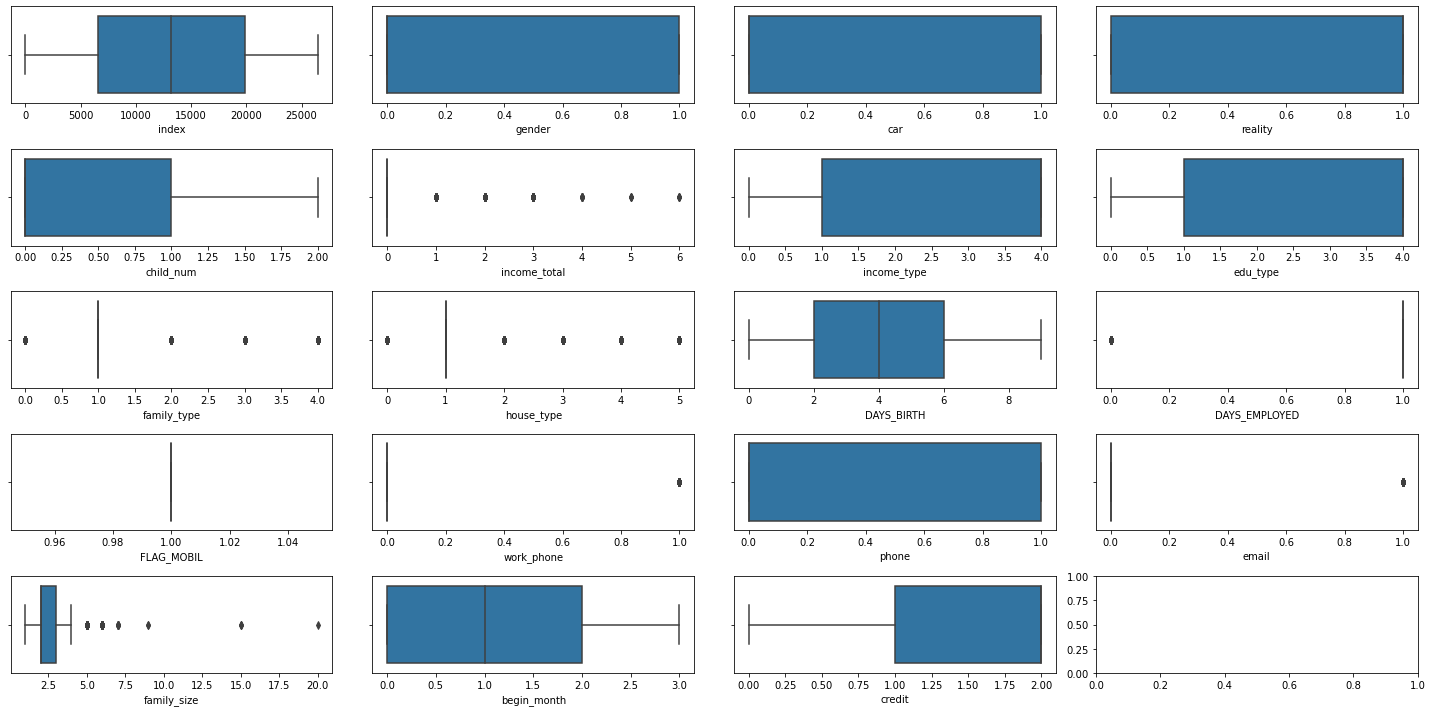

In [109]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for col in train.columns:
    sns.boxplot(train[col], ax=axs[index])
    index += 1
plt.tight_layout()

<AxesSubplot:xlabel='family_size', ylabel='Count'>

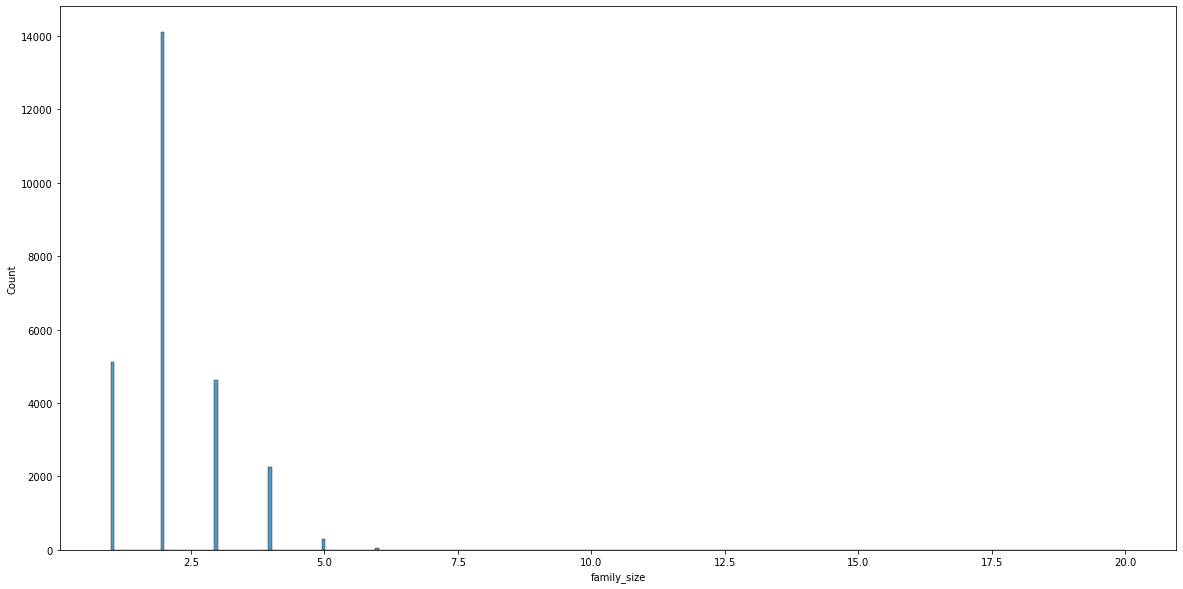

In [110]:
plt.figure(figsize=(20,10))
sns.histplot(train['family_size'])

In [111]:
#outlier
train[train['family_size'] >= 5]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
289,289,1,0,0,2,0,2,4,1,1,3,1,1,0,0,1,5.0,0,2.0
321,321,1,1,0,2,0,0,4,1,1,4,1,1,0,0,0,6.0,1,2.0
342,342,0,1,1,2,0,4,1,1,1,3,1,1,0,0,0,6.0,0,0.0
410,410,0,0,1,2,0,2,1,1,1,4,1,1,0,0,0,5.0,0,2.0
476,476,1,0,0,2,0,4,4,1,1,3,1,1,0,0,0,5.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25850,25850,0,1,1,2,0,0,4,1,1,2,1,1,0,1,0,5.0,0,2.0
25875,25875,0,1,0,2,0,4,1,1,1,3,1,1,1,1,0,5.0,0,1.0
26116,26116,0,1,1,2,1,4,4,1,1,3,1,1,0,0,0,5.0,3,2.0
26230,26230,0,0,1,2,0,2,1,1,1,2,1,1,0,1,0,5.0,1,2.0


In [112]:
train[train['family_size'] == 6]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
321,321,1,1,0,2,0,0,4,1,1,4,1,1,0,0,0,6.0,1,2.0
342,342,0,1,1,2,0,4,1,1,1,3,1,1,0,0,0,6.0,0,0.0
875,875,1,1,0,2,0,0,4,1,1,4,1,1,0,0,0,6.0,1,2.0
998,998,1,1,1,2,0,4,1,1,1,2,1,1,0,0,0,6.0,0,2.0
1061,1061,1,1,1,2,0,4,1,1,1,2,1,1,0,0,0,6.0,2,1.0
1417,1417,0,1,0,2,0,4,2,1,1,2,1,1,0,0,0,6.0,0,1.0
3116,3116,0,0,0,2,0,4,4,1,1,3,1,1,0,1,0,6.0,1,2.0
3134,3134,0,1,1,2,0,4,1,1,1,3,1,1,0,0,0,6.0,0,1.0
3973,3973,1,1,1,2,0,4,1,1,1,2,1,1,0,0,0,6.0,0,1.0
3988,3988,0,1,0,2,0,2,4,1,1,3,1,1,1,0,0,6.0,2,2.0


In [113]:
train[train['family_size'] > 7]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
8462,8462,1,1,1,2,0,4,4,2,1,5,1,1,0,0,0,15.0,0,2.0
9021,9021,1,1,1,2,0,4,4,2,1,5,1,1,0,0,0,15.0,3,2.0
10731,10731,0,0,1,2,0,4,4,3,1,1,1,1,1,1,0,20.0,0,2.0
25313,25313,0,0,0,2,0,4,4,1,1,3,1,1,1,1,0,9.0,1,2.0
25390,25390,1,1,1,2,0,4,4,2,1,5,1,1,0,0,0,15.0,2,2.0
25638,25638,0,0,0,2,0,4,4,1,1,3,1,1,1,1,0,9.0,2,2.0


In [114]:
train = train[train['family_size'] <= 7]
test = test[test['family_size'] <= 7]
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,3,1,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,2,1,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,6,1,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,4,1,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,4,1,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,2,1,1,0,0,0,4.0,0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,4,1,1,0,0,0,2.0,3,2.0
26454,26454,0,1,0,0,1,4,4,0,5,1,1,1,0,0,0,2.0,1,2.0
26455,26455,1,0,1,0,0,4,2,3,1,1,1,1,0,0,0,1.0,3,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,8,0,1,0,1,0,2.0,3
1,26458,0,0,1,0,0,2,1,1,1,6,1,1,0,1,0,2.0,2
2,26459,0,0,1,0,0,4,4,1,1,4,1,1,1,1,0,2.0,2
3,26460,1,1,0,0,0,0,4,1,1,6,1,1,1,0,0,2.0,2
4,26461,0,1,1,0,0,2,1,1,1,5,1,1,1,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,6,1,1,1,1,0,2.0,1
9996,36453,1,1,1,0,0,4,4,0,1,1,1,1,1,0,0,2.0,2
9997,36454,0,0,1,0,1,4,4,1,1,7,1,1,0,0,0,2.0,3
9998,36455,0,1,0,0,0,0,4,1,1,5,1,1,0,1,0,2.0,2


<AxesSubplot:>

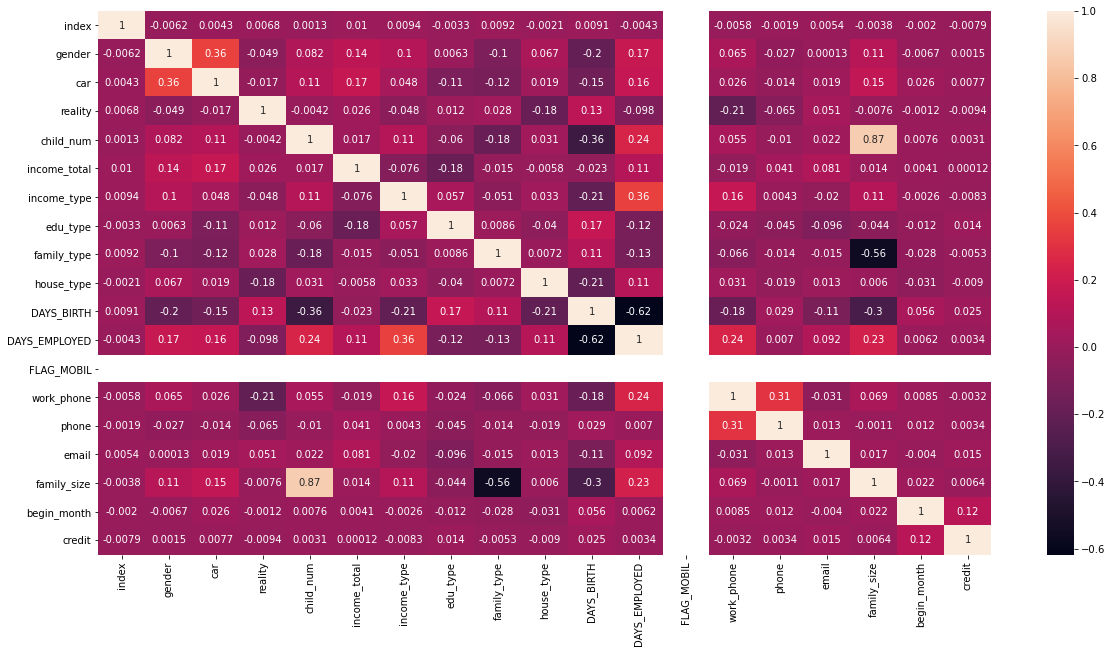

In [115]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)

In [116]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

In [117]:
#drop unnecessary columns
train = train.drop(['index', 'FLAG_MOBIL'], axis=1)
test = test.drop(['index', 'FLAG_MOBIL'], axis=1)
display(train, test)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,1,1,2,3,1,0,0,0,2.0,0,1.0
1,0,0,1,1,0,0,4,0,1,2,1,0,0,1,3.0,0,1.0
2,1,1,1,0,1,4,1,1,1,6,1,0,1,0,2.0,1,2.0
3,0,0,1,0,0,0,4,1,1,4,1,0,1,0,2.0,2,0.0
4,0,1,1,0,0,2,1,1,1,4,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,0,2,4,1,1,2,1,0,0,0,4.0,0,1.0
26453,0,0,1,1,0,4,1,2,1,4,1,0,0,0,2.0,3,2.0
26454,0,1,0,0,1,4,4,0,5,1,1,0,0,0,2.0,1,2.0
26455,1,0,1,0,0,4,2,3,1,1,1,0,0,0,1.0,3,2.0


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,1,1,0,0,0,1,4,0,1,8,0,0,1,0,2.0,3
1,0,0,1,0,0,2,1,1,1,6,1,0,1,0,2.0,2
2,0,0,1,0,0,4,4,1,1,4,1,1,1,0,2.0,2
3,1,1,0,0,0,0,4,1,1,6,1,1,0,0,2.0,2
4,0,1,1,0,0,2,1,1,1,5,1,1,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,0,4,2,1,1,6,1,1,1,0,2.0,1
9996,1,1,1,0,0,4,4,0,1,1,1,1,0,0,2.0,2
9997,0,0,1,0,1,4,4,1,1,7,1,0,0,0,2.0,3
9998,0,1,0,0,0,0,4,1,1,5,1,0,1,0,2.0,2


In [ ]:
#add derived variables
#age, 

# **[데이터 모델링]**

In [28]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [29]:
print(train_x.shape, train_y.shape, test.shape)

(26457, 18) (26457, 1) (10000, 18)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
# from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


# clf=RandomForestClassifier()
# clf.fit(X_train, y_train)
# y_pred=clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


In [ ]:
# from sklearn.model_selection import KFold, StratifiedKFold

# def run_kfold(clf):
#     folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
#     outcomes=[]
#     sub=np.zeros((test_x.shape[0], 3))  
#     for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
#         X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
#         y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
#         clf.fit(X_train, y_train)
        
#         predictions=clf.predict_proba(X_val)
        
#         logloss=log_loss(to_categorical(y_val['credit']), predictions)
#         outcomes.append(logloss)
#         print(f"FOLD {n_fold} : logloss:{logloss}")
        
#         sub+=clf.predict_proba(test_x)
        
        
#     mean_outcome=np.mean(outcomes)
    
#     print("Mean:{}".format(mean_outcome))
#     return sub/folds.n_splits

# my_submission = run_kfold(clf)

FOLD 0 : logloss:1.0392087466852982
FOLD 1 : logloss:1.0279703352830671
FOLD 2 : logloss:1.1041397256249195
FOLD 3 : logloss:1.0041502045151132
FOLD 4 : logloss:1.073084268697861
Mean:1.049710656161252


In [ ]:
my_submission

array([[0.104, 0.214, 0.682],
       [0.078, 0.194, 0.728],
       [0.062, 0.224, 0.714],
       ...,
       [0.054, 0.11 , 0.836],
       [0.118, 0.41 , 0.472],
       [0.12 , 0.394, 0.486]])

In [ ]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submission.loc[:,1:]=my_submission

In [ ]:
submission

,index,0,1,2
0,26457,0.104,0.214,0.682
1,26458,0.078,0.194,0.728
2,26459,0.062,0.224,0.714
3,26460,0.148,0.194,0.658
4,26461,0.134,0.362,0.504
...,...,...,...,...
9995,36452,0.118,0.354,0.528
9996,36453,0.156,0.368,0.476
9997,36454,0.054,0.110,0.836
9998,36455,0.118,0.410,0.472


In [ ]:
os.chdir('../baseline')

In [ ]:
submission.to_csv('baseline_submission.csv', index=False)